In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
#this line makes the notebook put the figures in-line rather than generate them in new windows

In [2]:
# helper functions

# helper function for geterating the data
def data_generator(N = 100,D = 2,K = 2):
    # N number of points per class; D dimensionality; k number of classes
    np.random.seed(0)
    
    X = np.zeros((N*K,D))    
    y = np.zeros((N*K), dtype='uint8')
    
    for j in range(K):
        ix = range(N*j,N*(j+1))
        r = np.linspace(0.0,1,N) # radius
        t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        y[ix] = j
    
    b = np.ones((N*K, 1))
    X = np.append(b, X, axis=1)
    
    fig = plt.figure()
    plt.title('Figure 1: DataSet')
    plt.scatter(X[:, 1], X[:, 2], c=y, s=40, cmap=plt.cm.Spectral)
    plt.xlim(X.min()-.5, X.max()+.5)
    plt.ylim(X.min()-.5, X.max()+.5)
    
    return X,y

# helper function for visualizing the boundaries
def visualize(sample, target, predict, se):
    """
    function for visualizing the classifier boundaries on the TOY dataset.
    @param sample: Training data features
    @param target: Target
    @param predict: Model prediction
    @param se: The model's session
    """

    h = 0.02
    x_min, x_max = sample[:, 1].min() - 1, sample[:, 1].max() + 1
    y_min, y_max = sample[:, 2].min() - 1, sample[:, 2].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    b = np.ones(xx.shape)
    Z = np.round(se.run(predict,{X:(np.c_[b.ravel(), xx.ravel(), yy.ravel()])}))
    Z = Z.reshape(xx.shape)
    fig = plt.figure()
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(sample[:, 1], sample[:, 2], c=target, s=10, cmap=plt.cm.Spectral)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

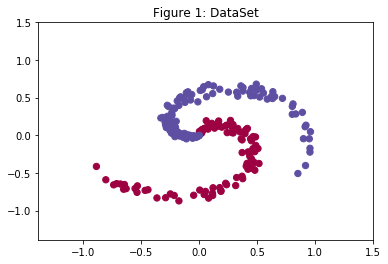

In [3]:
# TOY DataSet
sample, target = data_generator()
#print(target.shape)
#print(sample)
#print(target)

__Question 1 - Linear regression based classifier__

Epoch: 1 loss: 147.874 acc: 0.545
Epoch: 2 loss: 128.419 acc: 0.555
Epoch: 3 loss: 112.039 acc: 0.555
Epoch: 4 loss: 98.124 acc: 0.570
Epoch: 5 loss: 86.255 acc: 0.575
Epoch: 6 loss: 76.113 acc: 0.580
Epoch: 7 loss: 67.436 acc: 0.580
Epoch: 8 loss: 60.007 acc: 0.585
Epoch: 9 loss: 53.642 acc: 0.590
Epoch: 10 loss: 48.186 acc: 0.590
Epoch: 11 loss: 43.506 acc: 0.590
Epoch: 12 loss: 39.489 acc: 0.590
Epoch: 13 loss: 36.039 acc: 0.590
Epoch: 14 loss: 33.074 acc: 0.595
Epoch: 15 loss: 30.523 acc: 0.595
Epoch: 16 loss: 28.328 acc: 0.590
Epoch: 17 loss: 26.437 acc: 0.600
Epoch: 18 loss: 24.807 acc: 0.600
Epoch: 19 loss: 23.401 acc: 0.600
Epoch: 20 loss: 22.186 acc: 0.605
Epoch: 21 loss: 21.137 acc: 0.605
Epoch: 22 loss: 20.229 acc: 0.605
Epoch: 23 loss: 19.443 acc: 0.610
Epoch: 24 loss: 18.761 acc: 0.625
Epoch: 25 loss: 18.171 acc: 0.625
Epoch: 26 loss: 17.657 acc: 0.625
Epoch: 27 loss: 17.211 acc: 0.640
Epoch: 28 loss: 16.823 acc: 0.640
Epoch: 29 loss: 16.485 acc: 0.640
Epoch: 30 loss: 16.1

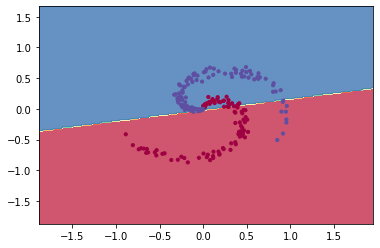

In [4]:
tf.set_random_seed(1)

X = tf.placeholder(tf.float32, [None,3])
Y = tf.placeholder(tf.float32, [None,1])

W = tf.Variable(tf.random_normal(shape=[3,1],seed=1))

first_layer = (tf.matmul(X,W))
objective_function = tf.reduce_sum((tf.square(first_layer-Y)))/2

LR = tf.train.GradientDescentOptimizer(learning_rate=.002).minimize(objective_function)

# predicted value above 0.5 -> predict = 1 = classify as positive
predict = tf.cast(tf.greater(first_layer,0.5),tf.float32)
accu = tf.reduce_mean(tf.cast(tf.equal(predict,Y),tf.float32))

se = tf.Session()
se.run(tf.global_variables_initializer())

for i in range(250):
    se.run(LR,{X : sample,Y: target.reshape(-1,1)})
    #-1 is like "unspecified"
    print("Epoch:", (i + 1),"loss:", "{:.3f}".format(se.run(objective_function,{X:sample,Y:target.reshape(-1,1)})), "acc:", "{:.3f}".format(se.run(accu,{X:sample,Y:target.reshape(-1,1)})))

visualize(sample,target, predict,se)

__The originally implemented classifier did not take the bias value into the consideration, which is why the clssification accuracies were low when compared to the accuracies of the modified classifier (with the bias) that is implemented above. The addition of the bias term allows the neural network to better fit the data, since the activation function is now able to shift as per the labels. The accuracy of the classification increases due to the increased flexibility of the model due to the addition of the bias term.__

__Question 2 - Logistic regression based classifier__

Epoch: 1 loss: 121.501 acc: 0.570
Epoch: 2 loss: 119.957 acc: 0.545
Epoch: 3 loss: 118.560 acc: 0.530
Epoch: 4 loss: 117.295 acc: 0.515
Epoch: 5 loss: 116.143 acc: 0.515
Epoch: 6 loss: 115.092 acc: 0.525
Epoch: 7 loss: 114.129 acc: 0.520
Epoch: 8 loss: 113.243 acc: 0.530
Epoch: 9 loss: 112.424 acc: 0.545
Epoch: 10 loss: 111.664 acc: 0.535
Epoch: 11 loss: 110.957 acc: 0.540
Epoch: 12 loss: 110.295 acc: 0.545
Epoch: 13 loss: 109.674 acc: 0.555
Epoch: 14 loss: 109.088 acc: 0.560
Epoch: 15 loss: 108.534 acc: 0.570
Epoch: 16 loss: 108.008 acc: 0.580
Epoch: 17 loss: 107.506 acc: 0.580
Epoch: 18 loss: 107.028 acc: 0.580
Epoch: 19 loss: 106.569 acc: 0.580
Epoch: 20 loss: 106.128 acc: 0.585
Epoch: 21 loss: 105.704 acc: 0.590
Epoch: 22 loss: 105.294 acc: 0.585
Epoch: 23 loss: 104.898 acc: 0.590
Epoch: 24 loss: 104.515 acc: 0.590
Epoch: 25 loss: 104.143 acc: 0.590
Epoch: 26 loss: 103.782 acc: 0.595
Epoch: 27 loss: 103.430 acc: 0.595
Epoch: 28 loss: 103.088 acc: 0.595
Epoch: 29 loss: 102.754 acc: 

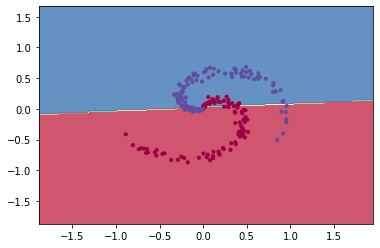

In [5]:
tf.set_random_seed(1)

X = tf.placeholder(tf.float32, [None,3])
Y = tf.placeholder(tf.float32, [None,1])

W = tf.Variable(tf.random_normal(shape=[3,1],seed=1))

first_layer = (tf.matmul(X,W))
exponential = tf.math.exp(tf.math.negative(first_layer))
y_predicted = tf.math.divide(tf.ones_like(exponential), tf.math.add(tf.ones_like(exponential),exponential))

# loss function
term1 = tf.math.multiply(Y, tf.math.log(y_predicted))
term2 = tf.math.multiply(tf.math.subtract(tf.ones_like(Y), Y), tf.math.log(tf.math.subtract(tf.ones_like(Y), y_predicted)))
objective_function = tf.math.negative(tf.reduce_sum(tf.math.add(term1, term2)))

LR = tf.train.GradientDescentOptimizer(learning_rate=.002).minimize(objective_function)

# predicted value above 0.5 -> predict = 1 = classify as positive
predict = tf.cast(tf.greater(y_predicted,0.5),tf.float32)
accu = tf.reduce_mean(tf.cast(tf.equal(predict,Y),tf.float32))

se = tf.Session()
se.run(tf.global_variables_initializer())

for i in range(275):
    se.run(LR,{X : sample,Y: target.reshape(-1,1)})
    #-1 is like "unspecified"
    print("Epoch:", (i + 1),"loss:", "{:.3f}".format(se.run(objective_function,{X:sample,Y:target.reshape(-1,1)})), "acc:", "{:.3f}".format(se.run(accu,{X:sample,Y:target.reshape(-1,1)})))

visualize(sample,target, predict,se)

__The classification result for logistic regression based classfication for this data is not very different from that of linear regression based classification. This is mainly due to the dataset which does not have any outliers, due to which the two regressions give almost the same results. Also due to the dataset having only 2 classes, linear regression can perform as well as logistic regression.__

__Question 3 - Neural network based classifier__

Epoch: 1 loss: 134.669 acc: 0.500
Epoch: 2 loss: 128.452 acc: 0.505
Epoch: 3 loss: 125.249 acc: 0.595
Epoch: 4 loss: 122.736 acc: 0.610
Epoch: 5 loss: 120.453 acc: 0.645
Epoch: 6 loss: 118.348 acc: 0.695
Epoch: 7 loss: 116.325 acc: 0.730
Epoch: 8 loss: 114.379 acc: 0.740
Epoch: 9 loss: 112.441 acc: 0.740
Epoch: 10 loss: 110.504 acc: 0.750
Epoch: 11 loss: 108.556 acc: 0.750
Epoch: 12 loss: 106.578 acc: 0.760
Epoch: 13 loss: 104.597 acc: 0.770
Epoch: 14 loss: 102.635 acc: 0.770
Epoch: 15 loss: 100.698 acc: 0.790
Epoch: 16 loss: 98.893 acc: 0.795
Epoch: 17 loss: 97.183 acc: 0.795
Epoch: 18 loss: 95.571 acc: 0.795
Epoch: 19 loss: 94.028 acc: 0.805
Epoch: 20 loss: 92.547 acc: 0.815
Epoch: 21 loss: 91.124 acc: 0.820
Epoch: 22 loss: 89.761 acc: 0.830
Epoch: 23 loss: 88.470 acc: 0.835
Epoch: 24 loss: 87.239 acc: 0.845
Epoch: 25 loss: 86.059 acc: 0.845
Epoch: 26 loss: 84.923 acc: 0.850
Epoch: 27 loss: 83.821 acc: 0.855
Epoch: 28 loss: 82.762 acc: 0.865
Epoch: 29 loss: 81.747 acc: 0.865
Epoch: 3

Epoch: 239 loss: 33.653 acc: 0.945
Epoch: 240 loss: 33.561 acc: 0.945
Epoch: 241 loss: 33.470 acc: 0.945
Epoch: 242 loss: 33.380 acc: 0.945
Epoch: 243 loss: 33.289 acc: 0.945
Epoch: 244 loss: 33.199 acc: 0.945
Epoch: 245 loss: 33.110 acc: 0.945
Epoch: 246 loss: 33.020 acc: 0.945
Epoch: 247 loss: 32.931 acc: 0.945
Epoch: 248 loss: 32.842 acc: 0.945
Epoch: 249 loss: 32.753 acc: 0.945
Epoch: 250 loss: 32.664 acc: 0.945
Epoch: 251 loss: 32.576 acc: 0.945
Epoch: 252 loss: 32.488 acc: 0.945
Epoch: 253 loss: 32.400 acc: 0.945
Epoch: 254 loss: 32.312 acc: 0.945
Epoch: 255 loss: 32.225 acc: 0.945
Epoch: 256 loss: 32.138 acc: 0.945
Epoch: 257 loss: 32.051 acc: 0.945
Epoch: 258 loss: 31.964 acc: 0.945
Epoch: 259 loss: 31.878 acc: 0.945
Epoch: 260 loss: 31.792 acc: 0.945
Epoch: 261 loss: 31.706 acc: 0.945
Epoch: 262 loss: 31.620 acc: 0.945
Epoch: 263 loss: 31.535 acc: 0.945
Epoch: 264 loss: 31.450 acc: 0.945
Epoch: 265 loss: 31.365 acc: 0.945
Epoch: 266 loss: 31.280 acc: 0.945
Epoch: 267 loss: 31.

Epoch: 480 loss: 18.512 acc: 0.975
Epoch: 481 loss: 18.473 acc: 0.980
Epoch: 482 loss: 18.436 acc: 0.975
Epoch: 483 loss: 18.397 acc: 0.980
Epoch: 484 loss: 18.361 acc: 0.975
Epoch: 485 loss: 18.323 acc: 0.980
Epoch: 486 loss: 18.289 acc: 0.975
Epoch: 487 loss: 18.252 acc: 0.980
Epoch: 488 loss: 18.221 acc: 0.975
Epoch: 489 loss: 18.186 acc: 0.980
Epoch: 490 loss: 18.158 acc: 0.975
Epoch: 491 loss: 18.125 acc: 0.980
Epoch: 492 loss: 18.101 acc: 0.975
Epoch: 493 loss: 18.071 acc: 0.985
Epoch: 494 loss: 18.051 acc: 0.975
Epoch: 495 loss: 18.018 acc: 0.985
Epoch: 496 loss: 18.002 acc: 0.975
Epoch: 497 loss: 17.973 acc: 0.985
Epoch: 498 loss: 17.961 acc: 0.975
Epoch: 499 loss: 17.942 acc: 0.985
Epoch: 500 loss: 17.940 acc: 0.975


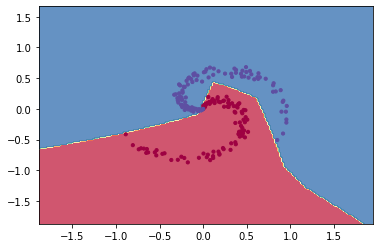

In [6]:
tf.set_random_seed(1)

input_neurons = 3
hidden_neurons1= 6
hidden_neurons2 = 6
output_neurons = 1

X = tf.placeholder(tf.float32, [None,input_neurons])
Y = tf.placeholder(tf.float32, [None,output_neurons]) #using only one output node since binary classification

W1 = tf.Variable(tf.random_normal(shape=[input_neurons,hidden_neurons1],seed=5))
W2 = tf.Variable(tf.random_normal(shape=[hidden_neurons1,hidden_neurons2],seed=5))
W3 = tf.Variable(tf.random_normal(shape=[hidden_neurons2,output_neurons],seed=1))

hidden_layer1 = tf.matmul(X,W1)
activation1 = tf.cast(hidden_layer1 > 0, hidden_layer1.dtype) * hidden_layer1 # relu
hidden_layer2 = tf.matmul(activation1, W2)
exponential = tf.math.exp(tf.math.negative(hidden_layer2)) # sigmoid
activation2 = tf.math.divide(tf.ones_like(exponential), tf.math.add(tf.ones_like(exponential),exponential))
output_layer = tf.matmul(activation2, W3)
exponential = tf.math.exp(tf.math.negative(output_layer))
result = tf.math.divide(tf.ones_like(exponential), tf.math.add(tf.ones_like(exponential),exponential))

# loss function
term1 = tf.math.multiply(Y, tf.math.log(result))
term2 = tf.math.multiply(tf.math.subtract(tf.ones_like(Y), Y), tf.math.log(tf.math.subtract(tf.ones_like(Y), result)))
objective_function = tf.math.negative(tf.reduce_sum(tf.math.add(term1, term2)))

LR = tf.train.GradientDescentOptimizer(learning_rate=.00225).minimize(objective_function)

# predicted value above 0.5 -> predict = 1 = classify as positive
predict = tf.cast(tf.greater(result,0.5),tf.float32)
accu = tf.reduce_mean(tf.cast(tf.equal(predict,Y),tf.float32))

se = tf.Session()
se.run(tf.global_variables_initializer())

for i in range(500):
    se.run(LR,{X : sample,Y: target.reshape(-1,1)})
    #-1 is like "unspecified"
    print("Epoch:", (i + 1),"loss:", "{:.3f}".format(se.run(objective_function,{X:sample,Y:target.reshape(-1,1)})), "acc:", "{:.3f}".format(se.run(accu,{X:sample,Y:target.reshape(-1,1)})))

visualize(sample,target, predict,se)

__When we compare the performance of the first two models with the neural network model, clearly, the latter is able to perform better with an almost perfect accuracy. The non-linear decision boundaries allows this model to accuratly classify the non-linear data. With the right choice of the learning rate and the number of epochs (which can be set empirically), it is possible to achieve 100% accuracy.__

__Question 4 - Keras implementation of the above neural network__

In [7]:
X = sample
Y = target

inputs = tf.keras.Input(shape=(3))
h1 = tf.keras.layers.Dense(6, activation='relu')(inputs)
h2 = tf.keras.layers.Dense(6, activation='sigmoid')(h1)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(h2)
#sensitive to initialization
model = tf.keras.Model(inputs=inputs, outputs=outputs)

sgd = tf.keras.optimizers.SGD(lr=0.004)
model.compile(optimizer=sgd,loss='binary_crossentropy',metrics=['accuracy'])
model.fit(X, Y, epochs=500)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 200 samples
Epoch 1/500
200/200 [==============================] - 0s 2ms/sample - loss: 0.6897 - acc: 0.5000
Epoch 2/500
200/200 [==============================] - 0s 101us/sample - loss: 0.6895 - acc: 0.5000
Epoch 3/500
200/200 [==============================] - 0s 113us/sample - loss: 0.6893 - acc: 0.5000
Epoch 4/500
200/200 [==============================] - 0s 109us/sample - loss: 0.6890 - acc: 0.5000
Epoch 5/500
200/200 [==============================] - 0s 88us/sample - loss: 0.6888 - acc: 0.5000
Epoch 6/500
200/200 [==============================] - 0s 109us/sample - loss: 0.6885 - acc: 0.5000
Epoch 7/500
200/200 [==============================] - 0s 97us/sample - loss: 0.6882 - acc: 0.5000
Epoch 8/500
200/200 [==============================] - 0s 120us/sample - loss: 0.6880 - acc: 0.5000
Epoch 9/

200/200 [==============================] - 0s 95us/sample - loss: 0.6810 - acc: 0.6150
Epoch 76/500
200/200 [==============================] - 0s 128us/sample - loss: 0.6809 - acc: 0.5950
Epoch 77/500
200/200 [==============================] - 0s 132us/sample - loss: 0.6808 - acc: 0.6200
Epoch 78/500
200/200 [==============================] - 0s 87us/sample - loss: 0.6808 - acc: 0.6200
Epoch 79/500
200/200 [==============================] - 0s 140us/sample - loss: 0.6808 - acc: 0.6250
Epoch 80/500
200/200 [==============================] - 0s 101us/sample - loss: 0.6807 - acc: 0.6400
Epoch 81/500
200/200 [==============================] - 0s 96us/sample - loss: 0.6806 - acc: 0.6050
Epoch 82/500
200/200 [==============================] - 0s 102us/sample - loss: 0.6805 - acc: 0.5950
Epoch 83/500
200/200 [==============================] - 0s 130us/sample - loss: 0.6805 - acc: 0.6250
Epoch 84/500
200/200 [==============================] - 0s 89us/sample - loss: 0.6804 - acc: 0.6250
Epoch 8

200/200 [==============================] - 0s 107us/sample - loss: 0.6763 - acc: 0.5050
Epoch 157/500
200/200 [==============================] - 0s 87us/sample - loss: 0.6762 - acc: 0.4900
Epoch 158/500
200/200 [==============================] - 0s 76us/sample - loss: 0.6762 - acc: 0.5000
Epoch 159/500
200/200 [==============================] - 0s 89us/sample - loss: 0.6761 - acc: 0.5000
Epoch 160/500
200/200 [==============================] - 0s 84us/sample - loss: 0.6761 - acc: 0.5000
Epoch 161/500
200/200 [==============================] - 0s 91us/sample - loss: 0.6760 - acc: 0.4950
Epoch 162/500
200/200 [==============================] - 0s 98us/sample - loss: 0.6759 - acc: 0.5000
Epoch 163/500
200/200 [==============================] - 0s 88us/sample - loss: 0.6759 - acc: 0.5000
Epoch 164/500
200/200 [==============================] - 0s 117us/sample - loss: 0.6759 - acc: 0.5000
Epoch 165/500
200/200 [==============================] - 0s 98us/sample - loss: 0.6758 - acc: 0.4950
Ep

200/200 [==============================] - 0s 119us/sample - loss: 0.6661 - acc: 0.6200
Epoch 317/500
200/200 [==============================] - 0s 82us/sample - loss: 0.6661 - acc: 0.6450
Epoch 318/500
200/200 [==============================] - 0s 96us/sample - loss: 0.6660 - acc: 0.6350
Epoch 319/500
200/200 [==============================] - 0s 88us/sample - loss: 0.6659 - acc: 0.6350
Epoch 320/500
200/200 [==============================] - 0s 100us/sample - loss: 0.6658 - acc: 0.6350
Epoch 321/500
200/200 [==============================] - 0s 88us/sample - loss: 0.6658 - acc: 0.6400
Epoch 322/500
200/200 [==============================] - 0s 88us/sample - loss: 0.6657 - acc: 0.6350
Epoch 323/500
200/200 [==============================] - 0s 101us/sample - loss: 0.6656 - acc: 0.6500
Epoch 324/500
200/200 [==============================] - 0s 82us/sample - loss: 0.6656 - acc: 0.6600
Epoch 325/500
200/200 [==============================] - 0s 86us/sample - loss: 0.6655 - acc: 0.6700
E

200/200 [==============================] - 0s 71us/sample - loss: 0.6521 - acc: 0.6250
Epoch 477/500
200/200 [==============================] - 0s 92us/sample - loss: 0.6521 - acc: 0.6200
Epoch 478/500
200/200 [==============================] - 0s 114us/sample - loss: 0.6519 - acc: 0.6250
Epoch 479/500
200/200 [==============================] - 0s 104us/sample - loss: 0.6518 - acc: 0.6250
Epoch 480/500
200/200 [==============================] - 0s 106us/sample - loss: 0.6517 - acc: 0.6350
Epoch 481/500
200/200 [==============================] - 0s 85us/sample - loss: 0.6516 - acc: 0.6300
Epoch 482/500
200/200 [==============================] - 0s 75us/sample - loss: 0.6515 - acc: 0.6300
Epoch 483/500
200/200 [==============================] - 0s 88us/sample - loss: 0.6514 - acc: 0.6200
Epoch 484/500
200/200 [==============================] - 0s 103us/sample - loss: 0.6513 - acc: 0.6250
Epoch 485/500
200/200 [==============================] - 0s 120us/sample - loss: 0.6511 - acc: 0.6250